In [1]:
# load all the packages required, but good practise is to load ONLY those required
# (importing all commands in a package using * can cause conflicts)
%matplotlib inline
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt import derived_field

In [2]:
np.__version__
from platform import python_version

print(python_version())

3.12.3


In [3]:
#location of the data for the final timestep of the N-body simulation - may need to amend this
location_finaltime = r"Enzo_64/DD0043/data0043"

In [4]:
# Make a derived field
# NB these must be defined BEFORE data is loaded
@derived_field(name = "radiusr", units = "Mpc", sampling_type="cell")
def _radiusr(field, data):
    center = dataset.domain_right_edge/2.0
    x = (data["x"] - center[0])
    y = (data["y"] - center[1])
    z = (data["z"] - center[2])
    return np.sqrt(x*x+y*y+z*z)

In [5]:
#Load the dataset
dataset = yt.load(location_finaltime)

/tmp/ipykernel_11652/1002656110.py:2: UserWarning: This dataset appears to be of type EnzoDataset, but the following requirements are currently missing: libconf
Please verify your installation.
  dataset = yt.load(location_finaltime)
yt : [INFO     ] 2025-07-01 14:43:15,431 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2025-07-01 14:43:15,431 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:43:15,432 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 14:43:15,432 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-01 14:43:15,433 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-01 14:43:15,433 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2025-07-01 14:43:15,433 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-01 14:43:15,434 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-01 14:43:15,435

In [6]:
#check that the dataset includes particles
dataset.particles_exist

Parsing Hierarchy : 100%|██████████████████| 752/752 [00:00<00:00, 26814.79it/s]
yt : [INFO     ] 2025-07-01 14:43:15,565 Gathering a field list (this may take a moment.)


True

In [7]:
#print the list of fields in the dataset
dataset.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'GasEnergy'),
 ('enzo', 'Temperature'),
 ('enzo', 'TotalEnergy'),
 ('enzo', 'x-velocity'),
 ('enzo', 'y-velocity'),
 ('enzo', 'z-velocity'),
 ('io', 'creation_time'),
 ('io', 'dynamical_time'),
 ('io', 'metallicity_fraction'),
 ('io', 'particle_index'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_type'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('nbody', 'creation_time'),
 ('nbody', 'dynamical_time'),
 ('nbody

In [22]:
# ask yt what the code units mean
# yt will know this for Enzo, but not necessarily for a random dataset
# the default is cgs (cm, grams and seconds)
# note that Mpccm/h are comoving units = Mpc / (1+z) / h
# where z is the redshift and h is the scaled hubble constant
print(dataset.length_unit)
print(dataset.mass_unit)
print(dataset.velocity_unit)

128 Mpccm/h
4.890451593516589e+50 g
8586501033.599192 cm/s


yt : [INFO     ] 2025-07-01 14:43:53,804 xlim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:43:53,805 ylim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:43:53,807 xlim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:43:53,807 ylim = 0.250000 0.750000
yt : [INFO     ] 2025-07-01 14:43:53,809 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



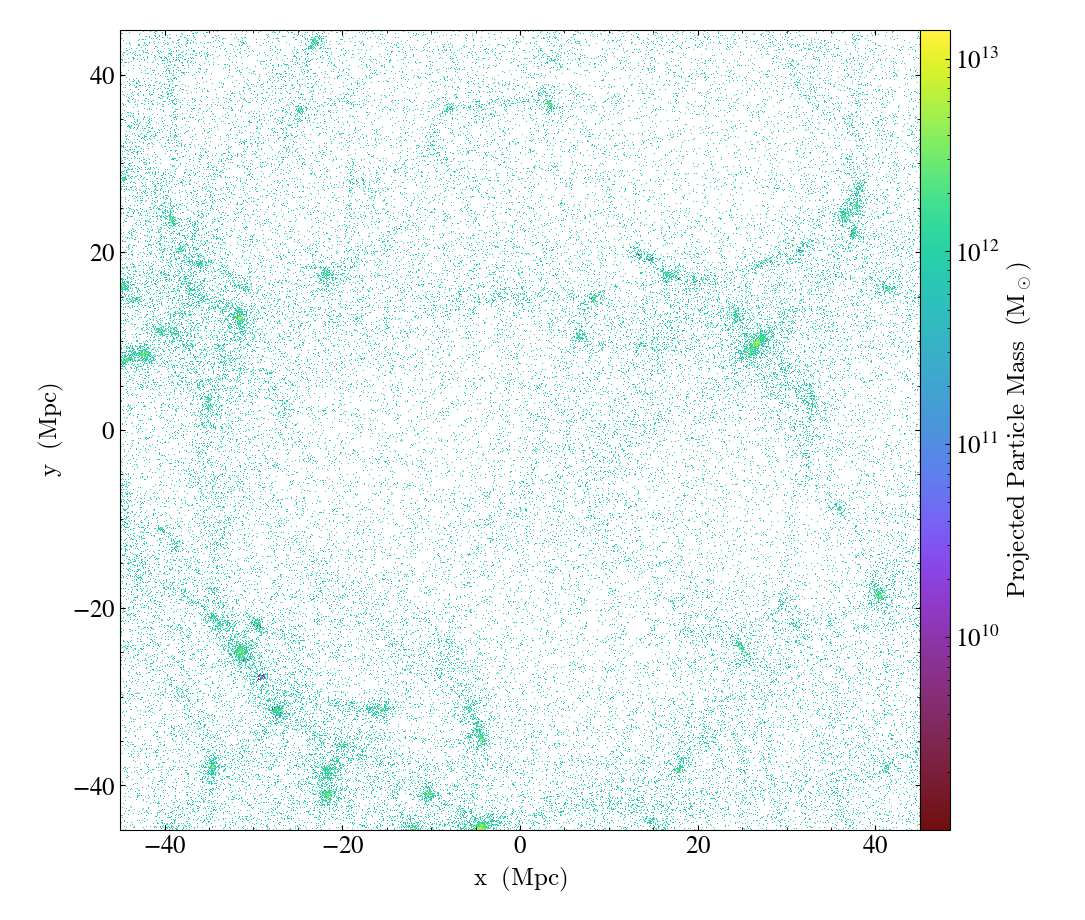

In [23]:
# create a particle plot, integrated through the z axis
plot0 = yt.ParticlePlot(dataset, 'particle_position_x', 
                        'particle_position_y', 'particle_mass', width=(0.5, 0.5))

# pick some appropriate units
plot0.set_axes_unit('Mpc')
plot0.set_unit('particle_mass', 'Msun')

#Display the plot in the notebook
plot0.show()

#Optionally, to save it to a file, uncomment the line below
#plot0.save("filename")

yt : [INFO     ] 2025-07-01 14:43:54,593 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:54,594 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:54,596 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:54,597 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:54,598 Making a fixed resolution buffer of (('enzo', 'Temperature')) 800 by 800



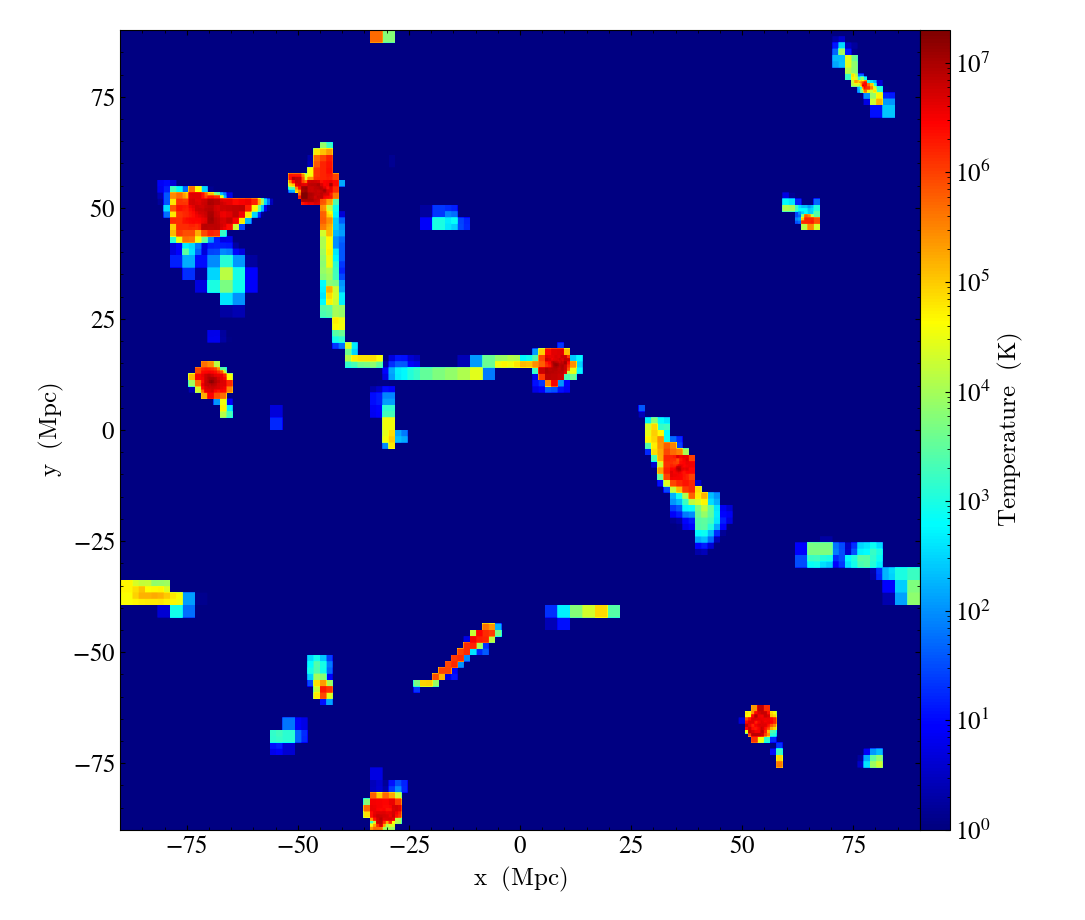

In [24]:
#Plot the temperature on a slice perpendicular to the z axis, centred on the middle of the grid
plot1 = yt.SlicePlot(dataset, "z" , "Temperature", center=[0.5,0.5,0.5])

#Try out a different colour scheme
plot1.set_cmap("Temperature", "Blue-Red")

#Display the plot in the notebook
plot1.show()

yt : [INFO     ] 2025-07-01 14:43:55,184 Projection completed
yt : [INFO     ] 2025-07-01 14:43:55,184 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:55,185 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:55,187 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:55,188 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-01 14:43:55,189 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



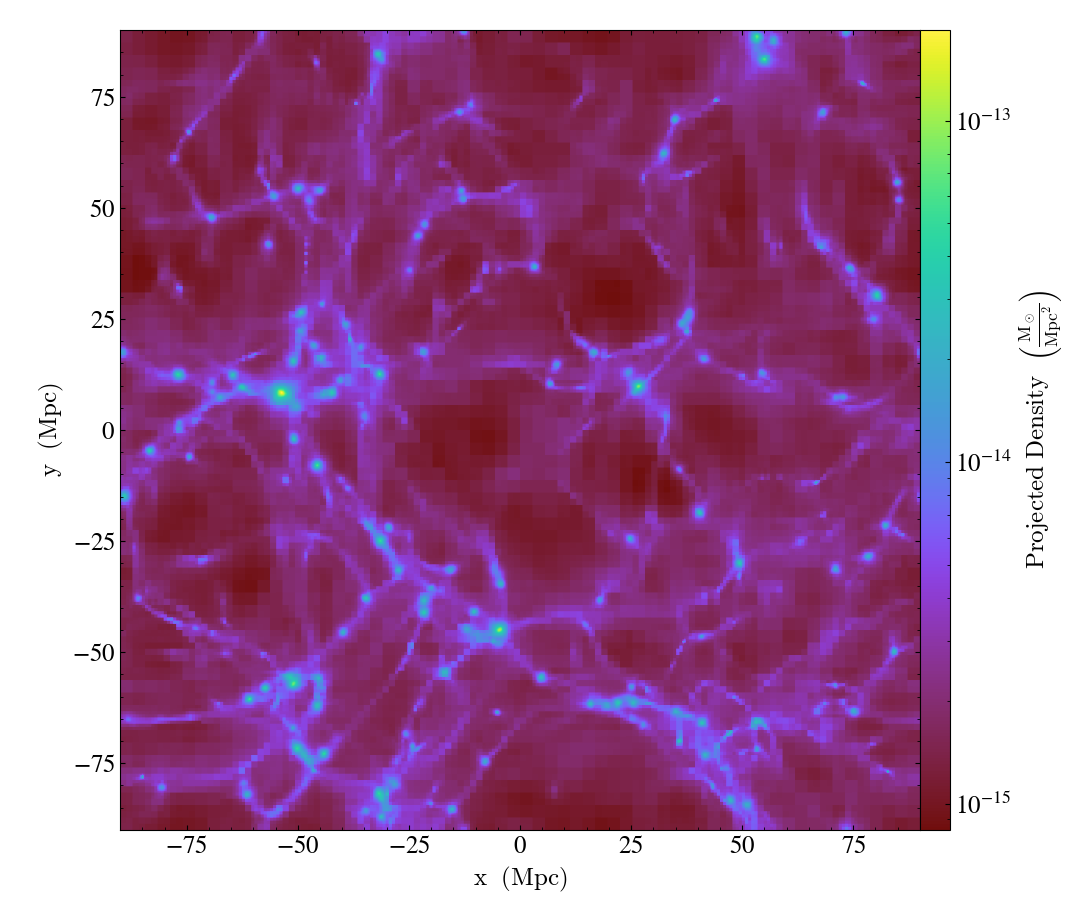

In [25]:
# Plot a projection of the density in the z direction
# ie an integral of the density through the box in this direction
plot2 = yt.ProjectionPlot(dataset, "z" , "Density")
plot2.set_unit('Density', 'Msun/Mpc/Mpc')

#Display the plot in the notebook
plot2.show()

yt : [INFO     ] 2025-07-01 14:43:55,673 Rendering scene (Can take a while).
yt : [INFO     ] 2025-07-01 14:43:55,675 Creating volume
yt : [INFO     ] 2025-07-01 14:43:58,684 Creating transfer function
yt : [INFO     ] 2025-07-01 14:43:58,684 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2025-07-01 14:44:02,231 Found previously rendered image to save.
yt : [INFO     ] 2025-07-01 14:44:02,232 Saving rendered image to data0043_Render_dark_matter_density.png


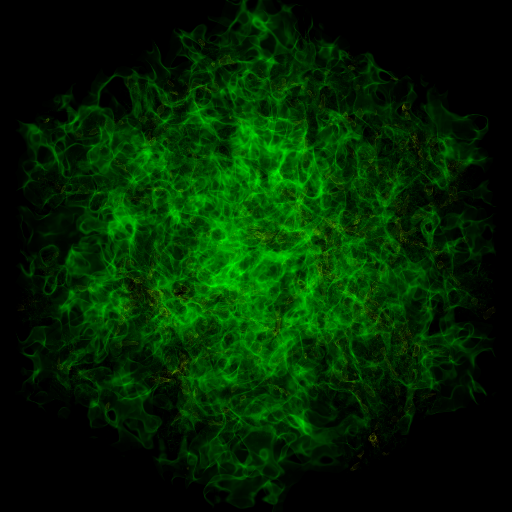

In [26]:
# Volume renderings are 3D projections rendering isocontours in any arbitrary field 
# (e.g. density, temperature, pressure, etc.)
# Create a volume rendering, which will determine data bounds, use the density
# field in the field_list, and set up a default transfer function (the function telling it what
# colour and opacity to assign to each level of density). 
# This will save a file to disk automatically, but we also ask to show it here
image, scene = yt.volume_render(dataset, field=('gas', 'dark_matter_density'))
scene.show()


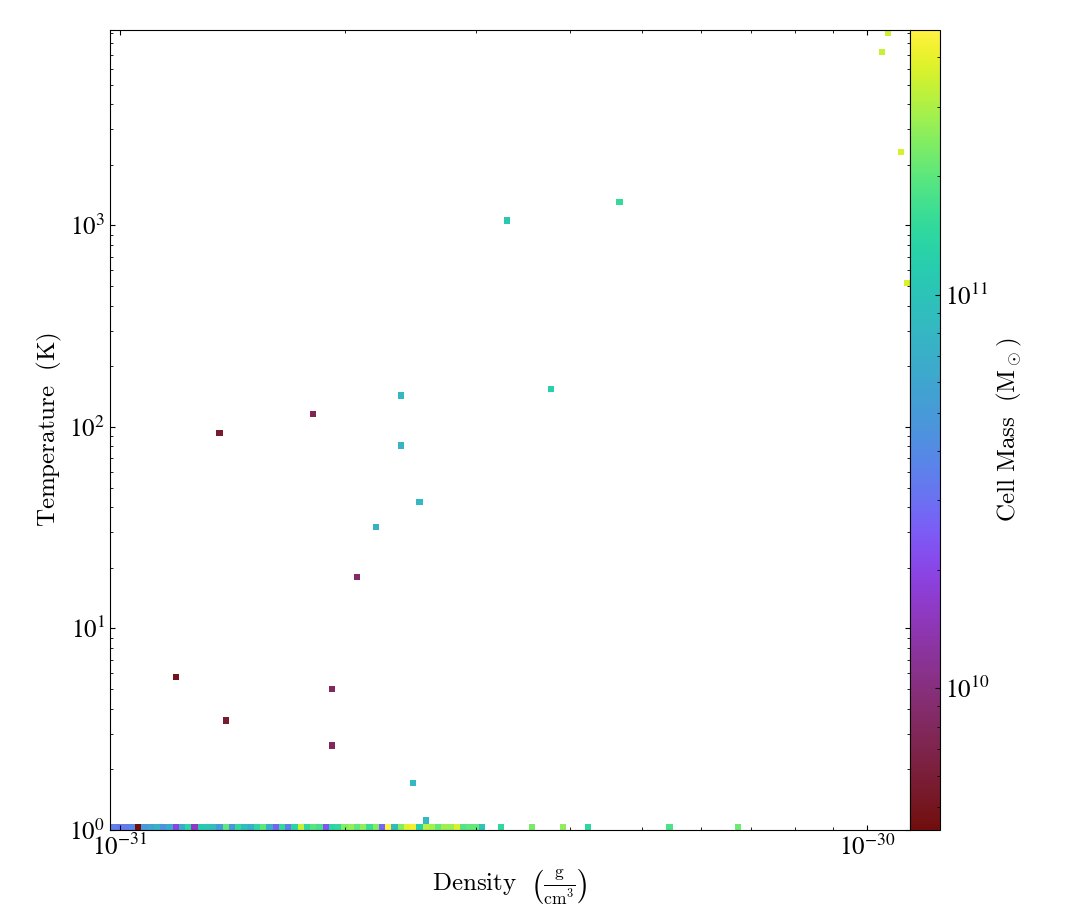

In [27]:
# Now we will create a phase plot

# Create a sphere of radius 10 Mpc in the center of the domain.
my_sphere = dataset.sphere("c", (10.0, "Mpc"))

# Create a PhasePlot object.
# (Setting weight to None calculates a simple unweighted sum.)
plot3 = yt.PhasePlot(my_sphere, "density", "temperature", "cell_mass",
                    weight_field=None)

# Set the units of mass to be in solar masses (not the default in cgs)
plot3.set_unit('cell_mass', 'Msun')

#Display the plot in the notebook
plot3.show()


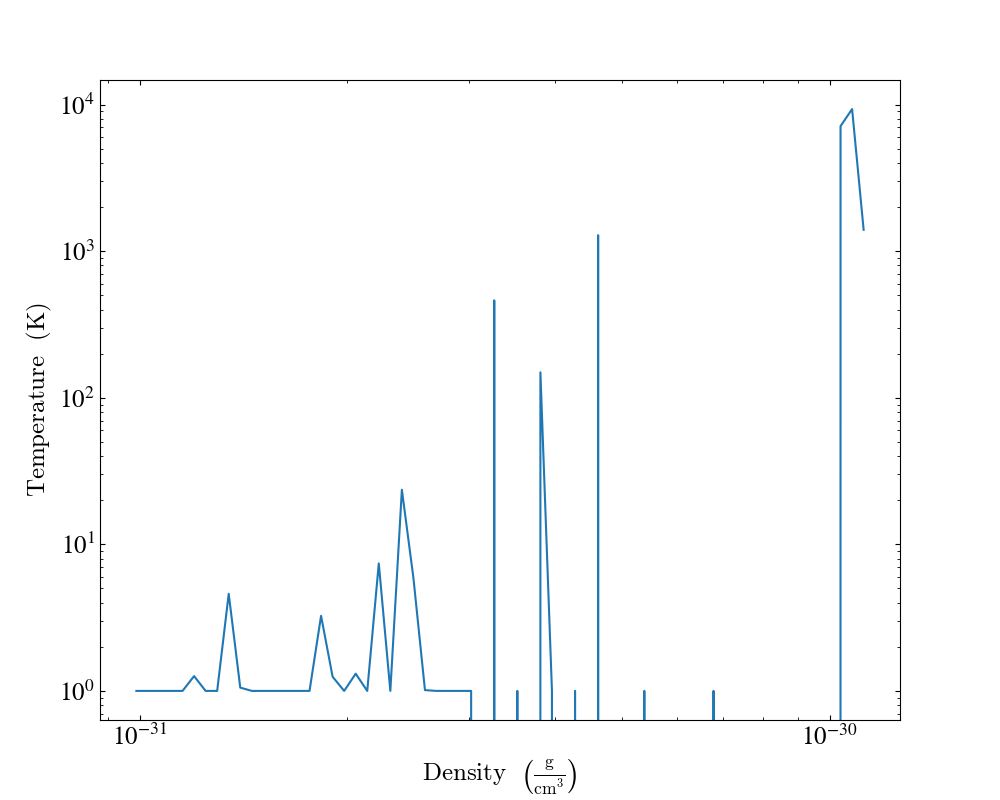

In [28]:
# Similarly, create a 1D profile within the sphere of the average temperature
# vs. density, weighted by mass.
plot4 = yt.ProfilePlot(my_sphere, "density", "temperature", weight_field="cell_mass")

#Display the plot in the notebook
plot4.show()

# Maximum and minimum density

In [37]:
value, location = dataset.find_max("Dark_Matter_Density")
print(value.in_units('g/Mpccm**3/h**3'))

1.5115779361945776e+48 g/(Mpccm**3*h**3)


In [38]:
#g to GeV
print(str(float(value.in_units('g/Mpccm**3/h**3'))*5.62*10**22*0.7**(-3)) + ' number of particles per Mpccm**3')

2.476696210324644e+71 number of particles per Mpccm**3


In [31]:
value, location = dataset.find_min("Dark_Matter_Density")
print(value.in_units('g/Mpccm**3/h**3'))

yt : [INFO     ] 2025-07-01 14:44:03,408 min value is 0.00000e+00 at 0.0078125000000000 0.1796875000000000 0.1171875000000000


0.0 g/(Mpccm**3*h**3)


In [39]:
value, location = dataset.find_max("Dark_Matter_Density")
print(value.in_units('g/Mpccm**3/h**3'))

1.5115779361945776e+48 g/(Mpccm**3*h**3)


yt : [INFO     ] 2025-07-01 14:44:54,145 xlim = 0.118341 0.284979
yt : [INFO     ] 2025-07-01 14:44:54,146 ylim = 0.463068 0.629706
yt : [INFO     ] 2025-07-01 14:44:54,148 xlim = 0.118341 0.284979
yt : [INFO     ] 2025-07-01 14:44:54,148 ylim = 0.463068 0.629706
yt : [INFO     ] 2025-07-01 14:44:54,149 Making a fixed resolution buffer of (('enzo', 'z-velocity')) 800 by 800



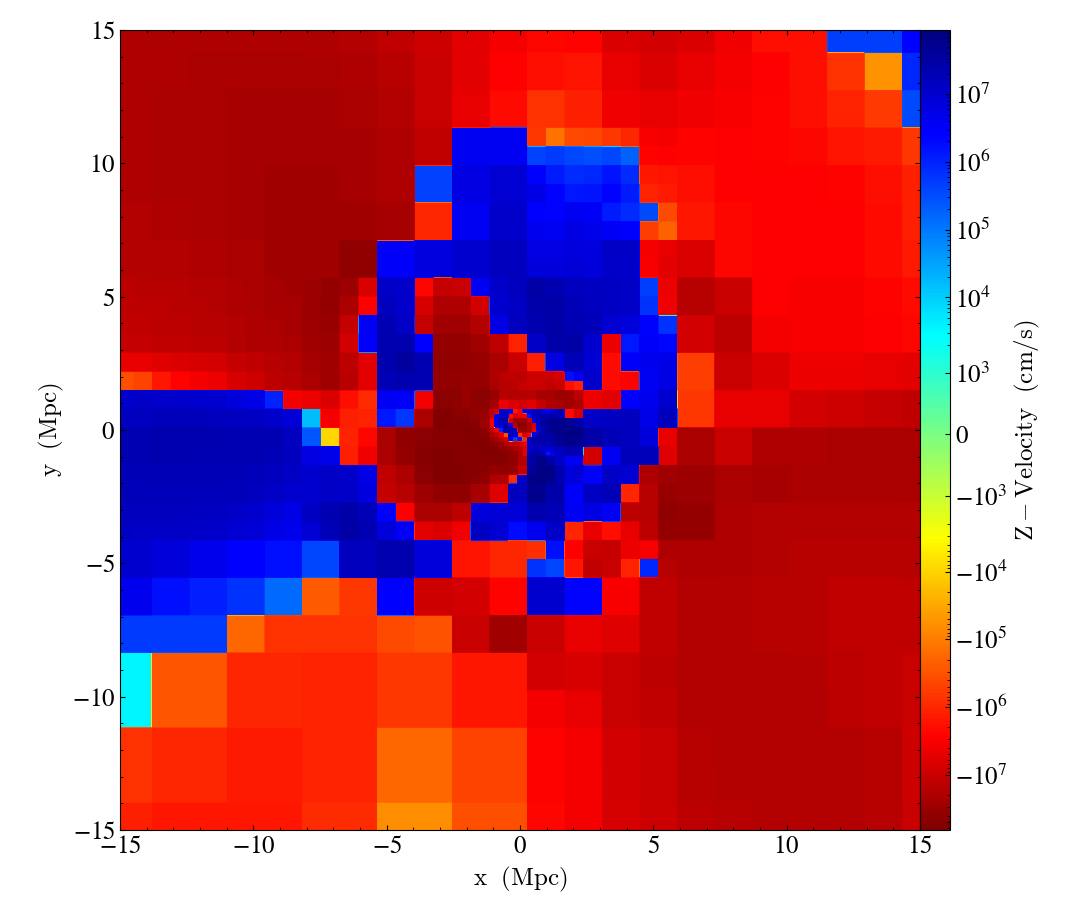

In [40]:
#Plot the temperature on a slice perpendicular to the z axis, centred on the middle of the grid
plot5 = yt.SlicePlot(dataset, "z" , "z-velocity", center=location, width=(30, "Mpc"))

#Try out a different colour scheme
plot5.set_cmap("z-velocity", "Blue-Red_r")
plot5.set_unit('z-velocity', 'cm/s')
#Display the plot in the notebook
plot5.show()

yt : [INFO     ] 2025-07-01 14:44:55,465 xlim = 0.118341 0.284979
yt : [INFO     ] 2025-07-01 14:44:55,465 ylim = 0.463068 0.629706
yt : [INFO     ] 2025-07-01 14:44:55,467 xlim = 0.118341 0.284979
yt : [INFO     ] 2025-07-01 14:44:55,468 ylim = 0.463068 0.629706
yt : [INFO     ] 2025-07-01 14:44:55,469 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



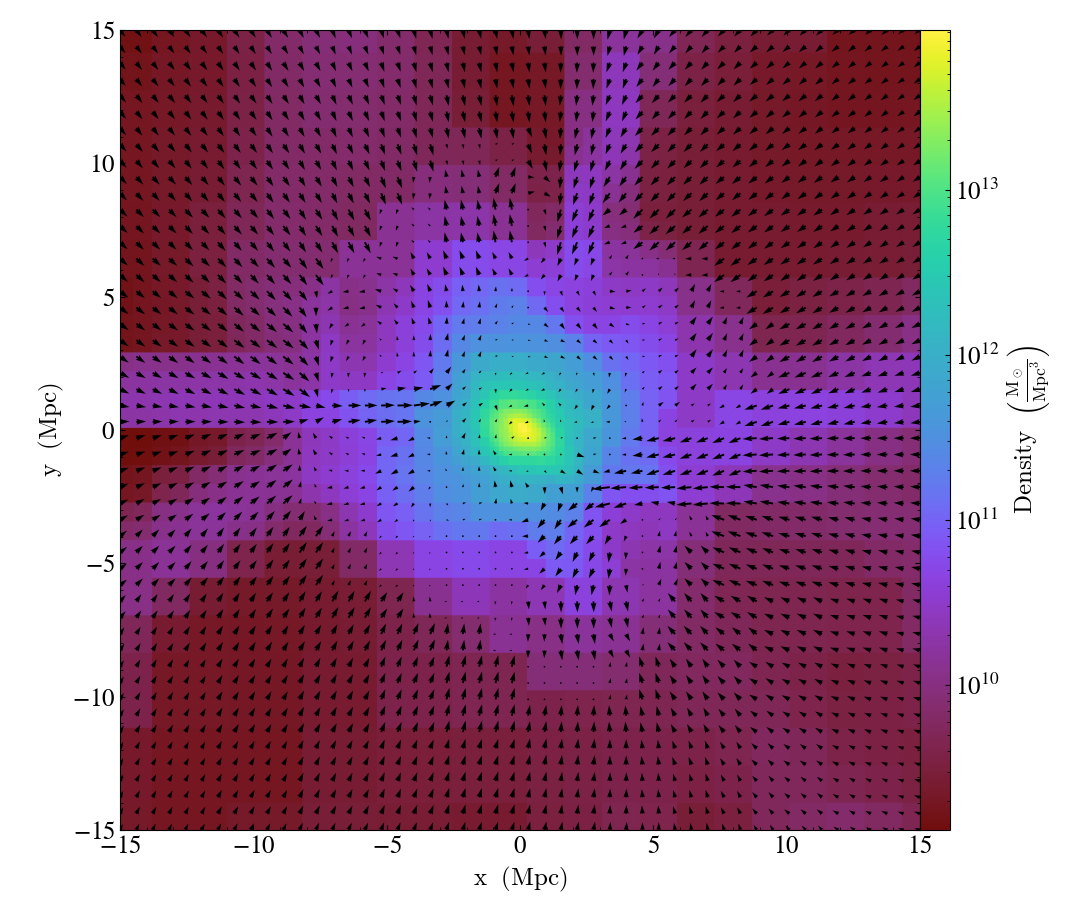

In [41]:
# Create the fifth plot: a slice with velocity vectors in the z-plane
plot5 = yt.SlicePlot(dataset, 'z', "Density", center=location, width=(30, "Mpc"))

plot5.set_unit('Density', 'Msun/Mpc/Mpc/Mpc')

# Annotate with velocity vectors
plot5.annotate_velocity()

# Save the plot
plot5.show()

yt : [INFO     ] 2025-07-01 14:47:30,146 xlim = 0.463068 0.629706
yt : [INFO     ] 2025-07-01 14:47:30,146 ylim = 0.029474 0.196112
yt : [INFO     ] 2025-07-01 14:47:30,149 xlim = 0.463068 0.629706
yt : [INFO     ] 2025-07-01 14:47:30,149 ylim = 0.029474 0.196112
yt : [INFO     ] 2025-07-01 14:47:30,150 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



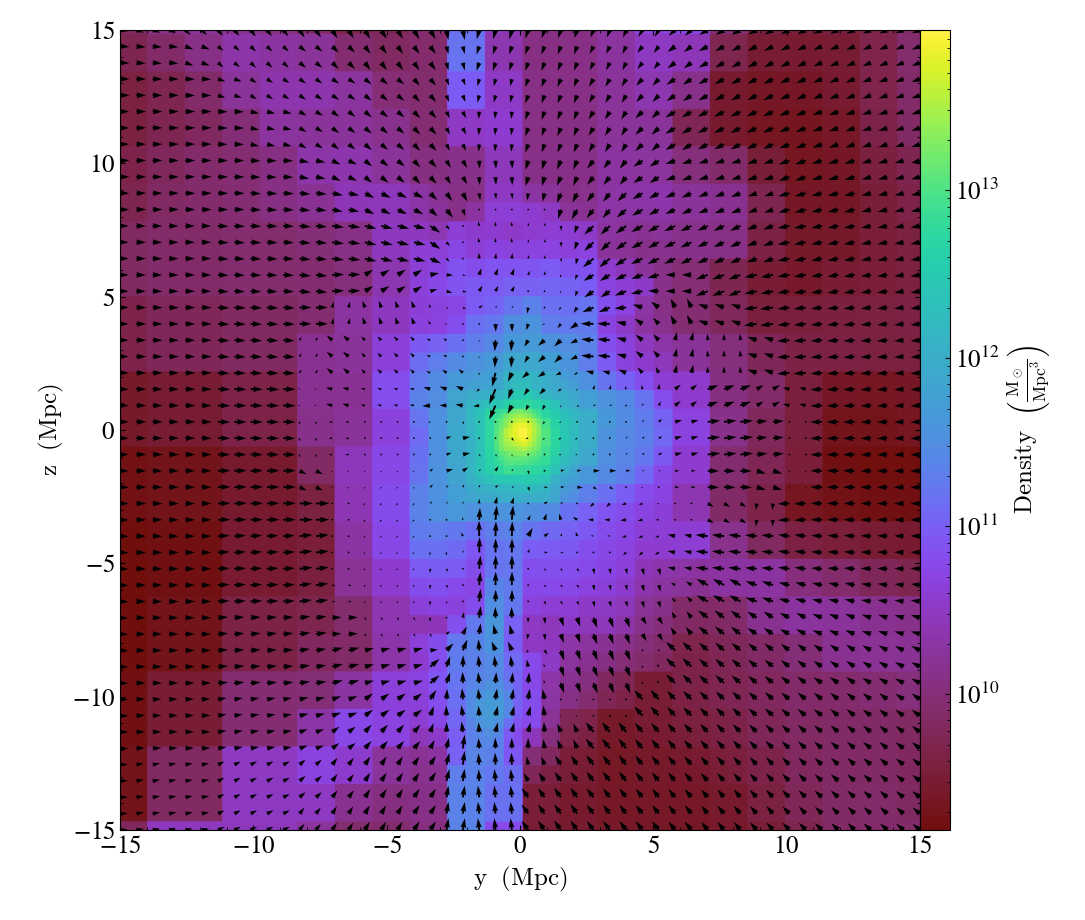

In [43]:
# Create the fifth plot: a slice with velocity vectors in the z-plane
plot5 = yt.SlicePlot(dataset, 'x', "Density", center=location, width=(30, "Mpc"))

plot5.set_unit('Density', 'Msun/Mpc/Mpc/Mpc')

# Annotate with velocity vectors
plot5.annotate_velocity()

# Save the plot
plot5.show()

yt : [INFO     ] 2025-07-01 14:47:46,104 xlim = 0.029474 0.196112
yt : [INFO     ] 2025-07-01 14:47:46,104 ylim = 0.118341 0.284979
yt : [INFO     ] 2025-07-01 14:47:46,106 xlim = 0.029474 0.196112
yt : [INFO     ] 2025-07-01 14:47:46,106 ylim = 0.118341 0.284979
yt : [INFO     ] 2025-07-01 14:47:46,107 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



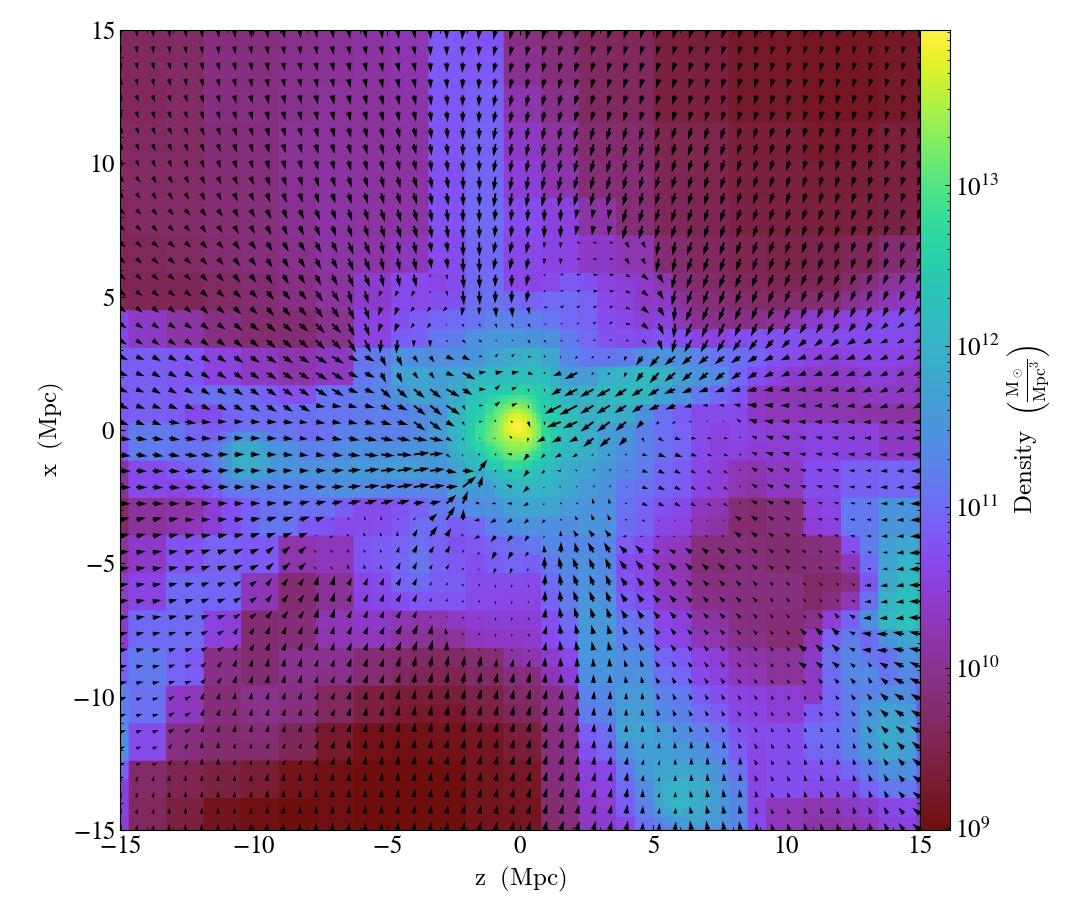

In [44]:
# Create the fifth plot: a slice with velocity vectors in the z-plane
plot5 = yt.SlicePlot(dataset, 'y', "Density", center=location, width=(30, "Mpc"))

plot5.set_unit('Density', 'Msun/Mpc/Mpc/Mpc')

# Annotate with velocity vectors
plot5.annotate_velocity()

# Save the plot
plot5.show()

In [42]:
#location of the time series data
location_alltimes = r"Enzo_64/DD00??/data00??"

# Create a time-series object.
#series = yt.simulation(location_alltimes, "Enzo")
series = yt.load(location_alltimes)

# max_density vs max redshift

In [35]:
# Lists to hold profiles, labels, and plot specifications.
profiles = []
labels = []
plot_specs = []
max_val = []
z_val = []

# Loop over each dataset in the time-series.
for dataset in series:
    # Create a data container to hold the whole dataset.
    ad = dataset.all_data()
    
    #extract a max value and redshift to plot later
    value, location = dataset.find_max("Dark_Matter_Density")
    
    z_val.append(dataset.current_redshift)
    max_val.append(value.in_units('kg/m**3')/(1+dataset.current_redshift)**3)
    
    # Create a 1d profile of density vs. temperature.
    #profiles.append(yt.create_profile(ad, ["density"],
                                   #fields=["temperature"]))
    # Add labels and linestyles.
    #labels.append("z = %.2f" % dataset.current_redshift)
    #plot_specs.append(dict(linewidth=2, alpha=0.7))

# Create the profile plot from the list of profiles.
#plot5 = yt.ProfilePlot.from_profiles(profiles, labels=labels,
                                 #plot_specs=plot_specs)

#Display the plot in the notebook
#plot5.show()

/usr/lib/python3/dist-packages/yt/data_objects/time_series.py:380: UserWarning: This dataset appears to be of type EnzoDataset, but the following requirements are currently missing: libconf
Please verify your installation.
  ds = load(output_fn, hint=hint, **kwargs)
yt : [INFO     ] 2025-07-01 14:44:04,628 Parameters: current_time              = 0.81651284465961
yt : [INFO     ] 2025-07-01 14:44:04,629 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:44:04,629 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 14:44:04,629 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-01 14:44:04,630 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-01 14:44:04,630 Parameters: current_redshift          = 99
yt : [INFO     ] 2025-07-01 14:44:04,630 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-01 14:44:04,631 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-

yt : [INFO     ] 2025-07-01 14:44:08,107 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|████████████████████| 39/39 [00:00<00:00, 14484.89it/s]
yt : [INFO     ] 2025-07-01 14:44:08,114 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-01 14:44:08,592 max value is 2.57178e+01 at 0.2773437500000000 0.4101562500000000 0.0585937500000000
yt : [INFO     ] 2025-07-01 14:44:08,639 Parameters: current_time              = 105.81657352332
yt : [INFO     ] 2025-07-01 14:44:08,640 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:44:08,640 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 14:44:08,641 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-01 14:44:08,641 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-01 14:44:08,641 Parameters: current_redshift          = 2.8879239324662
yt : [INFO     ] 2025-07-01 14:44:08,641 Parameters: omega_lambd

yt : [INFO     ] 2025-07-01 14:44:12,648 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-01 14:44:12,648 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|██████████████████| 241/241 [00:00<00:00, 28126.98it/s]
yt : [INFO     ] 2025-07-01 14:44:12,664 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-01 14:44:13,136 max value is 8.79322e+03 at 0.6372070312500000 0.5483398437500000 0.9018554687500000
yt : [INFO     ] 2025-07-01 14:44:13,184 Parameters: current_time              = 210.81657217615
yt : [INFO     ] 2025-07-01 14:44:13,184 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:44:13,185 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 14:44:13,185 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-01 14:44:13,186 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-01 14:44:13,186 Parameters: current_redshift       

yt : [INFO     ] 2025-07-01 14:44:17,487 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-01 14:44:17,487 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-01 14:44:17,487 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|██████████████████| 428/428 [00:00<00:00, 20364.63it/s]
yt : [INFO     ] 2025-07-01 14:44:17,520 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-01 14:44:18,129 max value is 1.77851e+04 at 0.2524414062500000 0.4379882812500000 0.0434570312500000
yt : [INFO     ] 2025-07-01 14:44:18,188 Parameters: current_time              = 315.81686257864
yt : [INFO     ] 2025-07-01 14:44:18,189 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:44:18,190 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 14:44:18,190 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-01 14:44:18,191 Parameters: cosmological_simulati

yt : [INFO     ] 2025-07-01 14:44:22,338 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-01 14:44:22,338 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-01 14:44:22,338 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-01 14:44:22,338 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|██████████████████| 581/581 [00:00<00:00, 29469.48it/s]
yt : [INFO     ] 2025-07-01 14:44:22,369 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-01 14:44:22,922 max value is 2.31454e+04 at 0.2504882812500000 0.4428710937500000 0.0424804687500000
yt : [INFO     ] 2025-07-01 14:44:22,967 Parameters: current_time              = 420.8167608835
yt : [INFO     ] 2025-07-01 14:44:22,968 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:44:22,968 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-01 14:44:22,968 Parameters: domain_right_edge         = [

yt : [INFO     ] 2025-07-01 14:44:27,842 Parameters: current_redshift          = 0.23879514715838
yt : [INFO     ] 2025-07-01 14:44:27,843 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-01 14:44:27,843 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-01 14:44:27,843 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-01 14:44:27,843 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|██████████████████| 675/675 [00:00<00:00, 25231.54it/s]
yt : [INFO     ] 2025-07-01 14:44:27,885 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-01 14:44:28,447 max value is 2.59955e+04 at 0.2485351562500000 0.4497070312500000 0.0434570312500000
yt : [INFO     ] 2025-07-01 14:44:28,491 Parameters: current_time              = 525.81661077372
yt : [INFO     ] 2025-07-01 14:44:28,492 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-01 14:44:28,492 Parameters: domain_left_edge      

yt : [INFO     ] 2025-07-01 14:44:33,042 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-01 14:44:33,043 Parameters: current_redshift          = 0.047717931261573
yt : [INFO     ] 2025-07-01 14:44:33,044 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-01 14:44:33,044 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-01 14:44:33,044 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-01 14:44:33,045 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|██████████████████| 724/724 [00:00<00:00, 26756.51it/s]
yt : [INFO     ] 2025-07-01 14:44:33,087 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2025-07-01 14:44:33,662 max value is 3.33339e+04 at 0.2016601562500000 0.5473632812500000 0.1108398437500000
yt : [INFO     ] 2025-07-01 14:44:33,711 Parameters: current_time              = 630.8171107444
yt : [INFO     ] 2025-07-01 14:44:33,711 Parameters: domain_dimensions         = [64

[unyt_quantity(2.75208242e-27, 'kg/m**3'), unyt_quantity(5.8295156e-27, 'kg/m**3'), unyt_quantity(8.61220241e-27, 'kg/m**3'), unyt_quantity(1.14241549e-26, 'kg/m**3'), unyt_quantity(2.74699506e-26, 'kg/m**3'), unyt_quantity(4.92128665e-26, 'kg/m**3'), unyt_quantity(7.30593545e-26, 'kg/m**3'), unyt_quantity(4.73178018e-25, 'kg/m**3'), unyt_quantity(2.30251633e-24, 'kg/m**3'), unyt_quantity(7.6714698e-24, 'kg/m**3'), unyt_quantity(9.60629044e-24, 'kg/m**3'), unyt_quantity(5.50732319e-23, 'kg/m**3'), unyt_quantity(3.89826688e-23, 'kg/m**3'), unyt_quantity(2.49798815e-23, 'kg/m**3'), unyt_quantity(3.01329422e-23, 'kg/m**3'), unyt_quantity(4.93428129e-23, 'kg/m**3'), unyt_quantity(3.85929873e-23, 'kg/m**3'), unyt_quantity(5.30714256e-23, 'kg/m**3'), unyt_quantity(4.98666219e-23, 'kg/m**3'), unyt_quantity(5.78837381e-23, 'kg/m**3'), unyt_quantity(5.05240768e-23, 'kg/m**3'), unyt_quantity(7.96858274e-23, 'kg/m**3'), unyt_quantity(5.47808898e-23, 'kg/m**3'), unyt_quantity(5.80904901e-23, 'kg/m

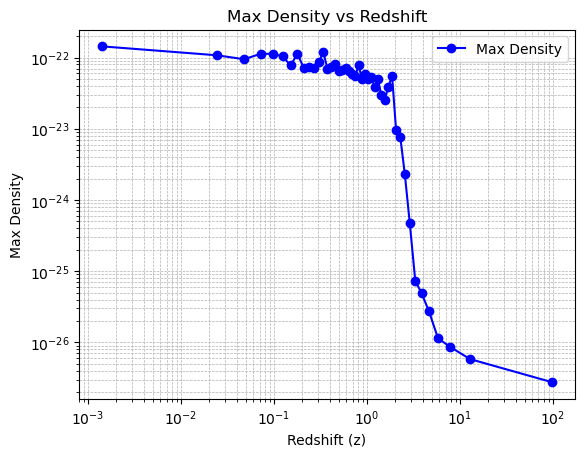

In [36]:
print(max_val)
print(z_val)

# Plot the max density versus redshift (in an ugly way)
# Use the matplotlib cheat sheet to improve this by annotating it
plt.plot(z_val, max_val, marker='o', linestyle='-', color='b', label='Max Density')

plt.xscale('log')  # Log scale on x-axis (redshift)
plt.yscale('log')  # Log scale on y-axis (density)

plt.xlabel('Redshift (z)')
plt.ylabel('Max Density')
plt.title('Max Density vs Redshift')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.show()
# to save it uncomment this
# plt.savefig()